## 1. Requirements

In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Set Args

In [3]:
weight_decay = 0
num_epochs = 10
use_cuda = True
batch_size = 100

## 3. Prepare Data

In [4]:
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

train_loader  = torch.utils.data.DataLoader(dataset=mnist_train, 
                                          batch_size=batch_size,
                                          shuffle=True)

mnist_test = dsets.MNIST(root='data/',
                          train=False,
                          transform=transforms.ToTensor(),
                          download=True)

test_loader  = torch.utils.data.DataLoader(dataset=mnist_test, 
                                          batch_size=10000,
                                          shuffle=False)

## 4. Define Model

In [5]:
device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
class FC(nn.Module):
    def __init__(self):
        super(FC, self).__init__()
            
        self.layer_1 = nn.Sequential(
            nn.Linear(28*28, 100),
            nn.ReLU()
        )
        
        self.layer_2 = nn.Sequential(
            nn.Linear(100, 100),
            nn.ReLU()
        )
        
        self.layer_3 = nn.Sequential(
            nn.Linear(100, 10)
        )
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        
        out_1 = self.layer_1(x)
        out_2 = self.layer_2(out_1)
        out_3 = self.layer_3(out_2)
    
        return out_3, out_2, out_1

In [7]:
model = FC().to(device)

## 5. Define Loss and Optimizer

In [8]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)

## 6. Train Model

In [9]:
for epoch in range(num_epochs):
    
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.to(device)
        Y = batch_labels.to(device)
        
        pre, _, _ = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/10], lter [100/600], Loss: 0.5275
Epoch [1/10], lter [200/600], Loss: 0.2618
Epoch [1/10], lter [300/600], Loss: 0.1694
Epoch [1/10], lter [400/600], Loss: 0.2137
Epoch [1/10], lter [500/600], Loss: 0.2742
Epoch [1/10], lter [600/600], Loss: 0.2312
Epoch [2/10], lter [100/600], Loss: 0.2740
Epoch [2/10], lter [200/600], Loss: 0.1189
Epoch [2/10], lter [300/600], Loss: 0.1204
Epoch [2/10], lter [400/600], Loss: 0.1688
Epoch [2/10], lter [500/600], Loss: 0.1166
Epoch [2/10], lter [600/600], Loss: 0.1465
Epoch [3/10], lter [100/600], Loss: 0.1128
Epoch [3/10], lter [200/600], Loss: 0.1074
Epoch [3/10], lter [300/600], Loss: 0.1271
Epoch [3/10], lter [400/600], Loss: 0.1159
Epoch [3/10], lter [500/600], Loss: 0.1479
Epoch [3/10], lter [600/600], Loss: 0.1370
Epoch [4/10], lter [100/600], Loss: 0.0626
Epoch [4/10], lter [200/600], Loss: 0.0596
Epoch [4/10], lter [300/600], Loss: 0.0882
Epoch [4/10], lter [400/600], Loss: 0.0664
Epoch [4/10], lter [500/600], Loss: 0.0475
Epoch [4/10

## 7. Test Model

In [10]:
model.eval()

correct = 0
total = 0

for images, labels in test_loader:
    
    images  = images.to(device)
    labels  = labels.to(device)
    
    outputs, _, _ = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    total += len(labels)
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 97.620000 %


## 8. Units of $\phi(x)$

In [11]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (10, 20))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

### 1) Unit Vector 

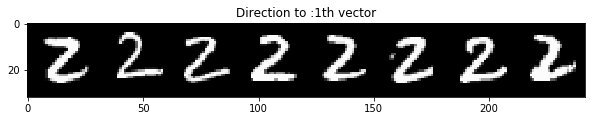

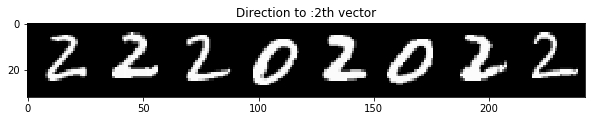

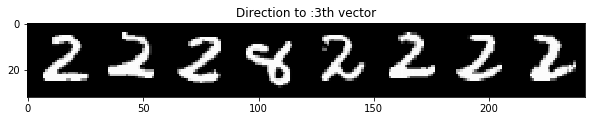

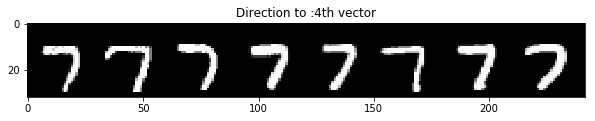

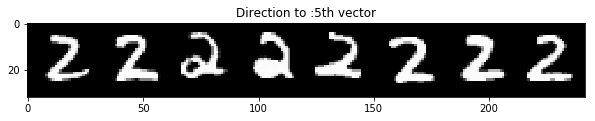

In [12]:
model.eval()

for i in range(5) :
    
    unit_vector = torch.eye(100)[i,:]
    
    for images, labels in test_loader:

        _, phi_x, _ = model(images.to(device))
        values = torch.mv(phi_x.cpu(), unit_vector)
        
    top_idx = np.argsort(values.data.numpy())[-8:]
    top_img = images[top_idx]
        
    imshow(torchvision.utils.make_grid(top_img, normalize=True), "Direction to :" + str(i+1) + "th vector")

### 2) Random Vector

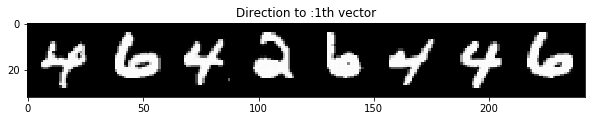

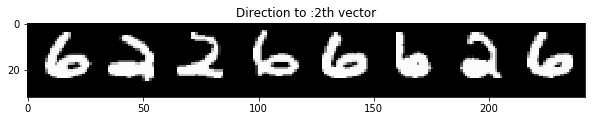

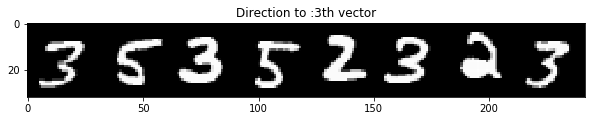

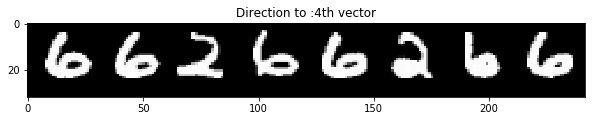

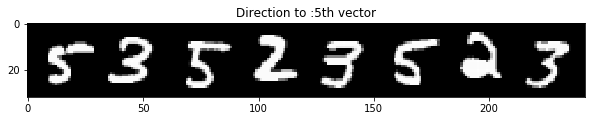

In [13]:
model.eval()

for i in range(5) :
    
    random_vector = torch.rand(100)

    for images, labels in test_loader:

        _, phi_x, _ = model(images.to(device))
        values = torch.mv(phi_x.cpu(), random_vector)
        
    top_idx = np.argsort(values.data.numpy())[-8:]
    top_img = images[top_idx]
        
    imshow(torchvision.utils.make_grid(top_img, normalize=True), "Direction to :" + str(i+1) + "th vector")

## 9. Small perbertation using Backprop

In [14]:
# In the paper, they use L-BFGS to solve equation with constraints.
# However, in this code, backpropagation method is used instead of L-BFGS.

In [15]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 20))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

In [16]:
sample_img = mnist_test[0][0]
outputs, _, _ = model(sample_img.to(device))

_, predicted = torch.max(outputs.data, 1)

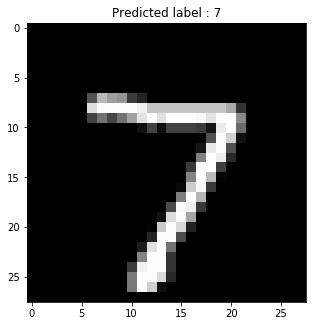

In [17]:
imshow(torchvision.utils.make_grid(sample_img, normalize=True), "Predicted label : " + str(predicted.item()))

Attack successed!


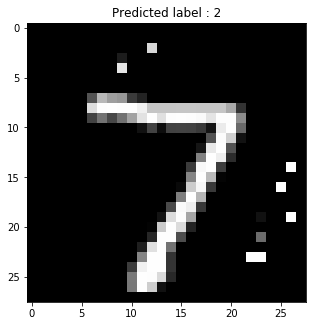

In [18]:
# Attack to answer a different number(num) to digit '7'

for num in range(10) :
    
    r = torch.rand(1, 28, 28).cuda()
    r.requires_grad_()

    optimizer_adv = optim.Adam([r], lr=0.001)

    for i in range(3000):

        X = torch.clamp(sample_img.cuda() + r, 0, 1)  
        Y = torch.tensor([num]).cuda()

        outputs, _, _ = model(X)
        _, predicted = torch.max(outputs.data, 1)

        loss_adv = r.abs().sum() + loss(outputs, Y)

        optimizer_adv.zero_grad()
        loss_adv.backward(retain_graph=True)
        optimizer_adv.step()

    if predicted.item() != 7 :
        print("Attack successed!")
        imshow(torchvision.utils.make_grid(X.data.cpu(), normalize=True), "Predicted label : " + str(predicted.item()))
        
        break